# 应用所学，进行数据分析

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import seaborn as sns

In [81]:
data = pd.read_csv('CDNOW.txt')

In [82]:
data.head()

,00001 19970101 1 11.77
0,00002 19970112 1 12.00
1,00002 19970112 5 77.00
2,00003 19970102 2 20.76
3,00003 19970330 2 20.76
4,00003 19970402 2 19.54


In [83]:
cols = ['id','date','number','amount']

In [84]:
del data

In [85]:
data = pd.read_csv('CDNOW.txt',names = cols,sep='\s+')
data.head()

,id,date,number,amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [86]:
data.describe()

,id,date,number,amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
id        69659 non-null int64
date      69659 non-null int64
number    69659 non-null int64
amount    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


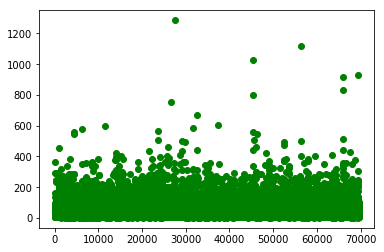

In [89]:
plt.scatter(x = range(len(data['id'])),y=data['amount'],color='g')

### 时间序列转换

In [90]:
data['order_date'] = pd.to_datetime(data.date,format='%Y%m%d')
data.head()

,id,date,number,amount,order_date
0,1,19970101,1,11.77,1997-01-01
1,2,19970112,1,12.00,1997-01-12
2,2,19970112,5,77.00,1997-01-12
3,3,19970102,2,20.76,1997-01-02
4,3,19970330,2,20.76,1997-03-30


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
id            69659 non-null int64
date          69659 non-null int64
number        69659 non-null int64
amount        69659 non-null float64
order_date    69659 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.7 MB


In [92]:
data['month'] = data.order_date.astype('datetime64[M]')
data.head()

,id,date,number,amount,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
id            69659 non-null int64
date          69659 non-null int64
number        69659 non-null int64
amount        69659 non-null float64
order_date    69659 non-null datetime64[ns]
month         69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


## 数据探索

In [94]:
data_grouped = data.groupby('id').sum()

In [95]:
data_grouped.head()

,date,number,amount
id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [96]:
data_grouped.tail()

,date,number,amount
id,,,
23566,19970325,2,36.00
23567,19970325,1,20.97
23568,59911152,6,121.70
23569,19970325,2,25.74
23570,39940651,5,94.08


In [97]:
data_grouped.describe()

,date,number,amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


In [100]:
data_grouped = data.groupby('month').sum()
data_grouped

,id,date,number,amount
month,,,,
1997-01-01,35273171,178293208077,19416,299060.17
1997-02-01,123068150,225104260501,24921,379590.03
1997-03-01,194141841,231615700500,26159,393155.27
1997-04-01,47747598,75508137939,9729,142824.49
1997-05-01,34656858,57814641593,7275,107933.30
1997-06-01,36278371,60990263308,7301,108395.87
1997-07-01,34018612,58753852984,8131,122078.88
1997-08-01,27164872,46332292151,5851,88367.69
1997-09-01,27226075,45853223374,5729,81948.80


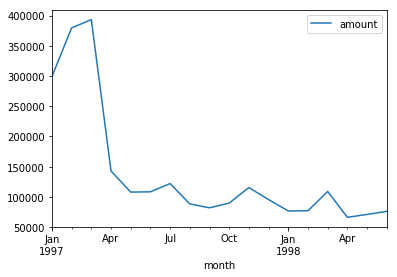

In [101]:
data_grouped.plot(y='amount')

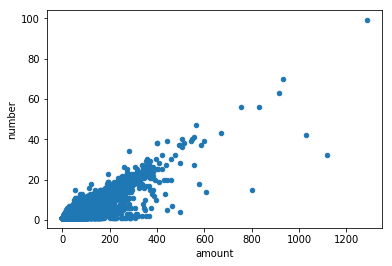

In [104]:
data.plot.scatter(x='amount',y='number')
plt.title = '订单散点图'

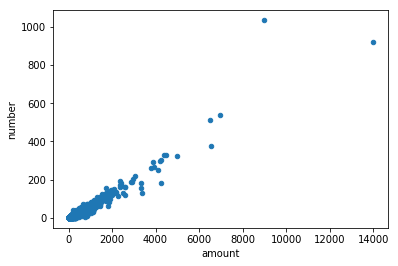

In [107]:
data.groupby('id').sum().plot.scatter(x='amount',y='number')